In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
sns.set()

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Initial Analysis

In [4]:
df = pd.read_csv('..\\Data\\healthcare-dataset-stroke-data.csv')
df.head()

id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1

In [5]:
df.shape

(5110, 12)

In [6]:
df.describe()

id          age  hypertension  heart_disease  \
count   5110.000000  5110.000000   5110.000000    5110.000000   
mean   36517.829354    43.226614      0.097456       0.054012   
std    21161.721625    22.612647      0.296607       0.226063   
min       67.000000     0.080000      0.000000       0.000000   
25%    17741.250000    25.000000      0.000000       0.000000   
50%    36932.000000    45.000000      0.000000       0.000000   
75%    54682.000000    61.000000      0.000000       0.000000   
max    72940.000000    82.000000      1.000000       1.000000   

       avg_glucose_level          bmi       stroke  
count        5110.000000  4909.000000  5110.000000  
mean          106.147677    28.893237     0.048728  
std            45.283560     7.854067     0.215320  
min            55.120000    10.300000     0.000000  
25%            77.245000    23.500000     0.000000  
50%            91.885000    28.100000     0.000000  
75%           114.090000    33.100000     0.000000  
max           271.740000    97.600000     1.000000

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [8]:
df.count()

id                   5110
gender               5110
age                  5110
hypertension         5110
heart_disease        5110
ever_married         5110
work_type            5110
Residence_type       5110
avg_glucose_level    5110
bmi                  4909
smoking_status       5110
stroke               5110
dtype: int64

In [9]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [10]:
df['bmi'].isnull().sum()

201

In [11]:
df.nunique()

id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

In [12]:
column_names = df.columns.values
for i in column_names:
    print(f"{i} = {df[i].unique()}\n")

id = [ 9046 51676 31112 ... 19723 37544 44679]

gender = ['Male' 'Female' 'Other']

age = [6.70e+01 6.10e+01 8.00e+01 4.90e+01 7.90e+01 8.10e+01 7.40e+01 6.90e+01
 5.90e+01 7.80e+01 5.40e+01 5.00e+01 6.40e+01 7.50e+01 6.00e+01 5.70e+01
 7.10e+01 5.20e+01 8.20e+01 6.50e+01 5.80e+01 4.20e+01 4.80e+01 7.20e+01
 6.30e+01 7.60e+01 3.90e+01 7.70e+01 7.30e+01 5.60e+01 4.50e+01 7.00e+01
 6.60e+01 5.10e+01 4.30e+01 6.80e+01 4.70e+01 5.30e+01 3.80e+01 5.50e+01
 1.32e+00 4.60e+01 3.20e+01 1.40e+01 3.00e+00 8.00e+00 3.70e+01 4.00e+01
 3.50e+01 2.00e+01 4.40e+01 2.50e+01 2.70e+01 2.30e+01 1.70e+01 1.30e+01
 4.00e+00 1.60e+01 2.20e+01 3.00e+01 2.90e+01 1.10e+01 2.10e+01 1.80e+01
 3.30e+01 2.40e+01 3.40e+01 3.60e+01 6.40e-01 4.10e+01 8.80e-01 5.00e+00
 2.60e+01 3.10e+01 7.00e+00 1.20e+01 6.20e+01 2.00e+00 9.00e+00 1.50e+01
 2.80e+01 1.00e+01 1.80e+00 3.20e-01 1.08e+00 1.90e+01 6.00e+00 1.16e+00
 1.00e+00 1.40e+00 1.72e+00 2.40e-01 1.64e+00 1.56e+00 7.20e-01 1.88e+00
 1.24e+00 8.00e-01 4.00e-01 8.00e-

In [13]:
df.duplicated().sum()

0

In [14]:
df['smoking_status'].value_counts()

smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64

In [15]:
age_converted = [int(i) for i in df['age']]
print(len(age_converted))
df['int_age'] = age_converted

5110


In [16]:
df[['age','int_age']]

age  int_age
0     67.0       67
1     61.0       61
2     80.0       80
3     49.0       49
4     79.0       79
...    ...      ...
5105  80.0       80
5106  81.0       81
5107  35.0       35
5108  51.0       51
5109  44.0       44

[5110 rows x 2 columns]

In [17]:
df = df.drop('age', axis=1)

In [18]:
df.head()

id  gender  hypertension  heart_disease ever_married      work_type  \
0   9046    Male             0              1          Yes        Private   
1  51676  Female             0              0          Yes  Self-employed   
2  31112    Male             0              1          Yes        Private   
3  60182  Female             0              0          Yes        Private   
4   1665  Female             1              0          Yes  Self-employed   

  Residence_type  avg_glucose_level   bmi   smoking_status  stroke  int_age  
0          Urban             228.69  36.6  formerly smoked       1       67  
1          Rural             202.21   NaN     never smoked       1       61  
2          Rural             105.92  32.5     never smoked       1       80  
3          Urban             171.23  34.4           smokes       1       49  
4          Rural             174.12  24.0     never smoked       1       79

In [19]:
print(df['int_age'].unique())

[67 61 80 49 79 81 74 69 59 78 54 50 64 75 60 57 71 52 82 65 58 42 48 72
 63 76 39 77 73 56 45 70 66 51 43 68 47 53 38 55  1 46 32 14  3  8 37 40
 35 20 44 25 27 23 17 13  4 16 22 30 29 11 21 18 33 24 34 36  0 41  5 26
 31  7 12 62  2  9 15 28 10 19  6]


# Insights

Text(0.5, 1.0, 'Positive stroke data in the Whole Population')

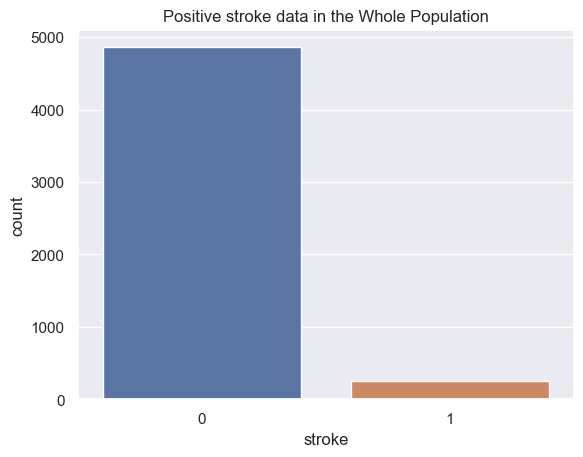

In [20]:
sns.countplot(data=df,x='stroke')
plt.title('Positive stroke data in the Whole Population')

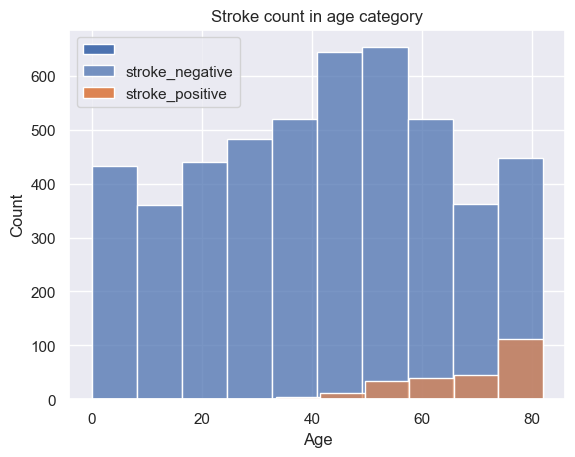

In [21]:
grouped = df.groupby('stroke')
fig, ax = plt.subplots()
for category, group_data in grouped:
    sns.histplot(group_data['int_age'], bins=10, label=category)
ax.set_xlabel('Age')
ax.set_ylabel('Count')
ax.set_title('Stroke count in age category')
ax.legend(["",'stroke_negative','stroke_positive'])
plt.show()

Text(0, 0.5, 'BMI')

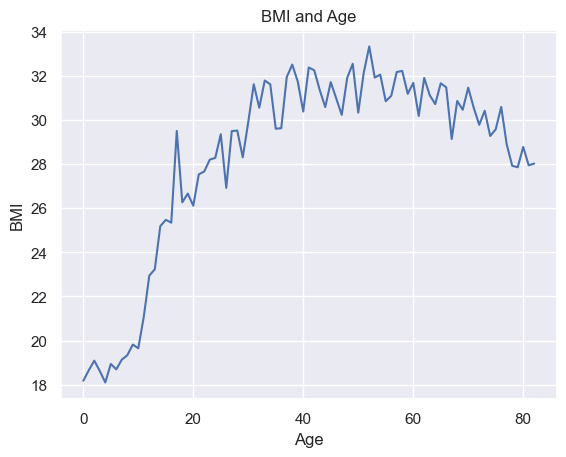

In [22]:
sns.lineplot(data=df,x='int_age',y='bmi',ci=None)
plt.title('BMI and Age')
plt.xlabel('Age')
plt.ylabel('BMI')

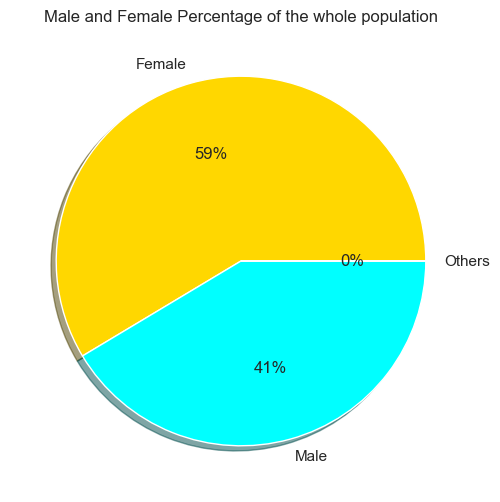

In [23]:
plt.figure(figsize=(15,6))
data = df['gender'].value_counts()
labels = ['Female', 'Male', 'Others']
plt.pie(data, labels = labels, colors = ['gold','cyan','silver'], autopct='%.00f%%',shadow=True)
plt.title('Male and Female Percentage of the whole population')
plt.show()

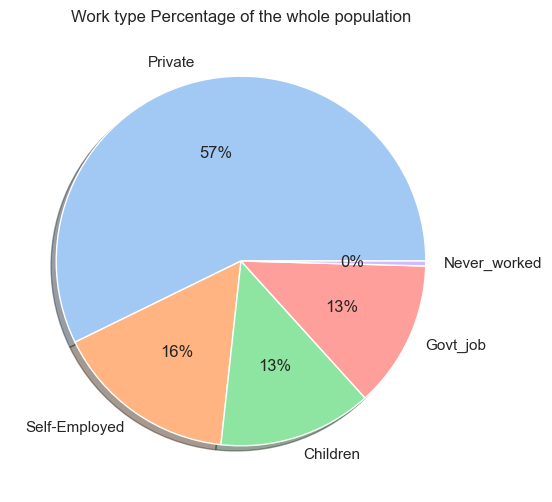

In [24]:
plt.figure(figsize=(15,6))
data = df['work_type'].value_counts()
labels = ['Private', 'Self-Employed','Children','Govt_job','Never_worked']
colors = sns.color_palette('pastel')[0:5]
plt.pie(data, labels = labels, colors = colors, autopct='%.00f%%',shadow=True)
plt.title('Work type Percentage of the whole population')
plt.show()

<Axes: xlabel='smoking_status', ylabel='count'>

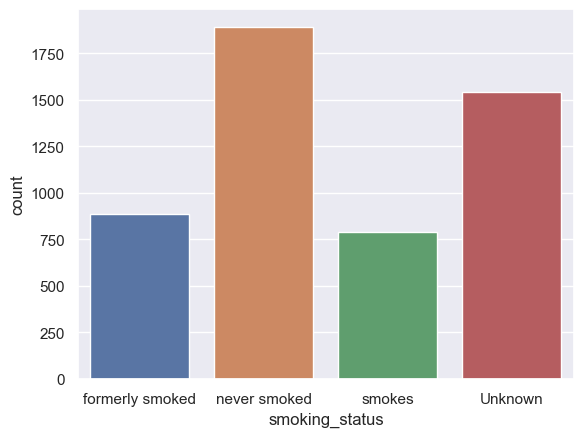

In [25]:
sns.countplot(data=df,x='smoking_status')

<Axes: xlabel='Residence_type', ylabel='count'>

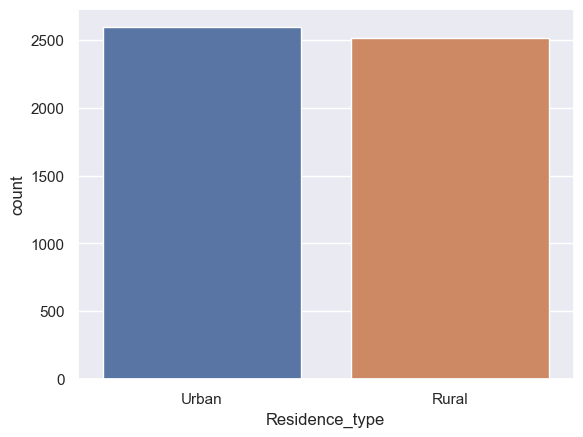

In [26]:
sns.countplot(data=df,x='Residence_type')

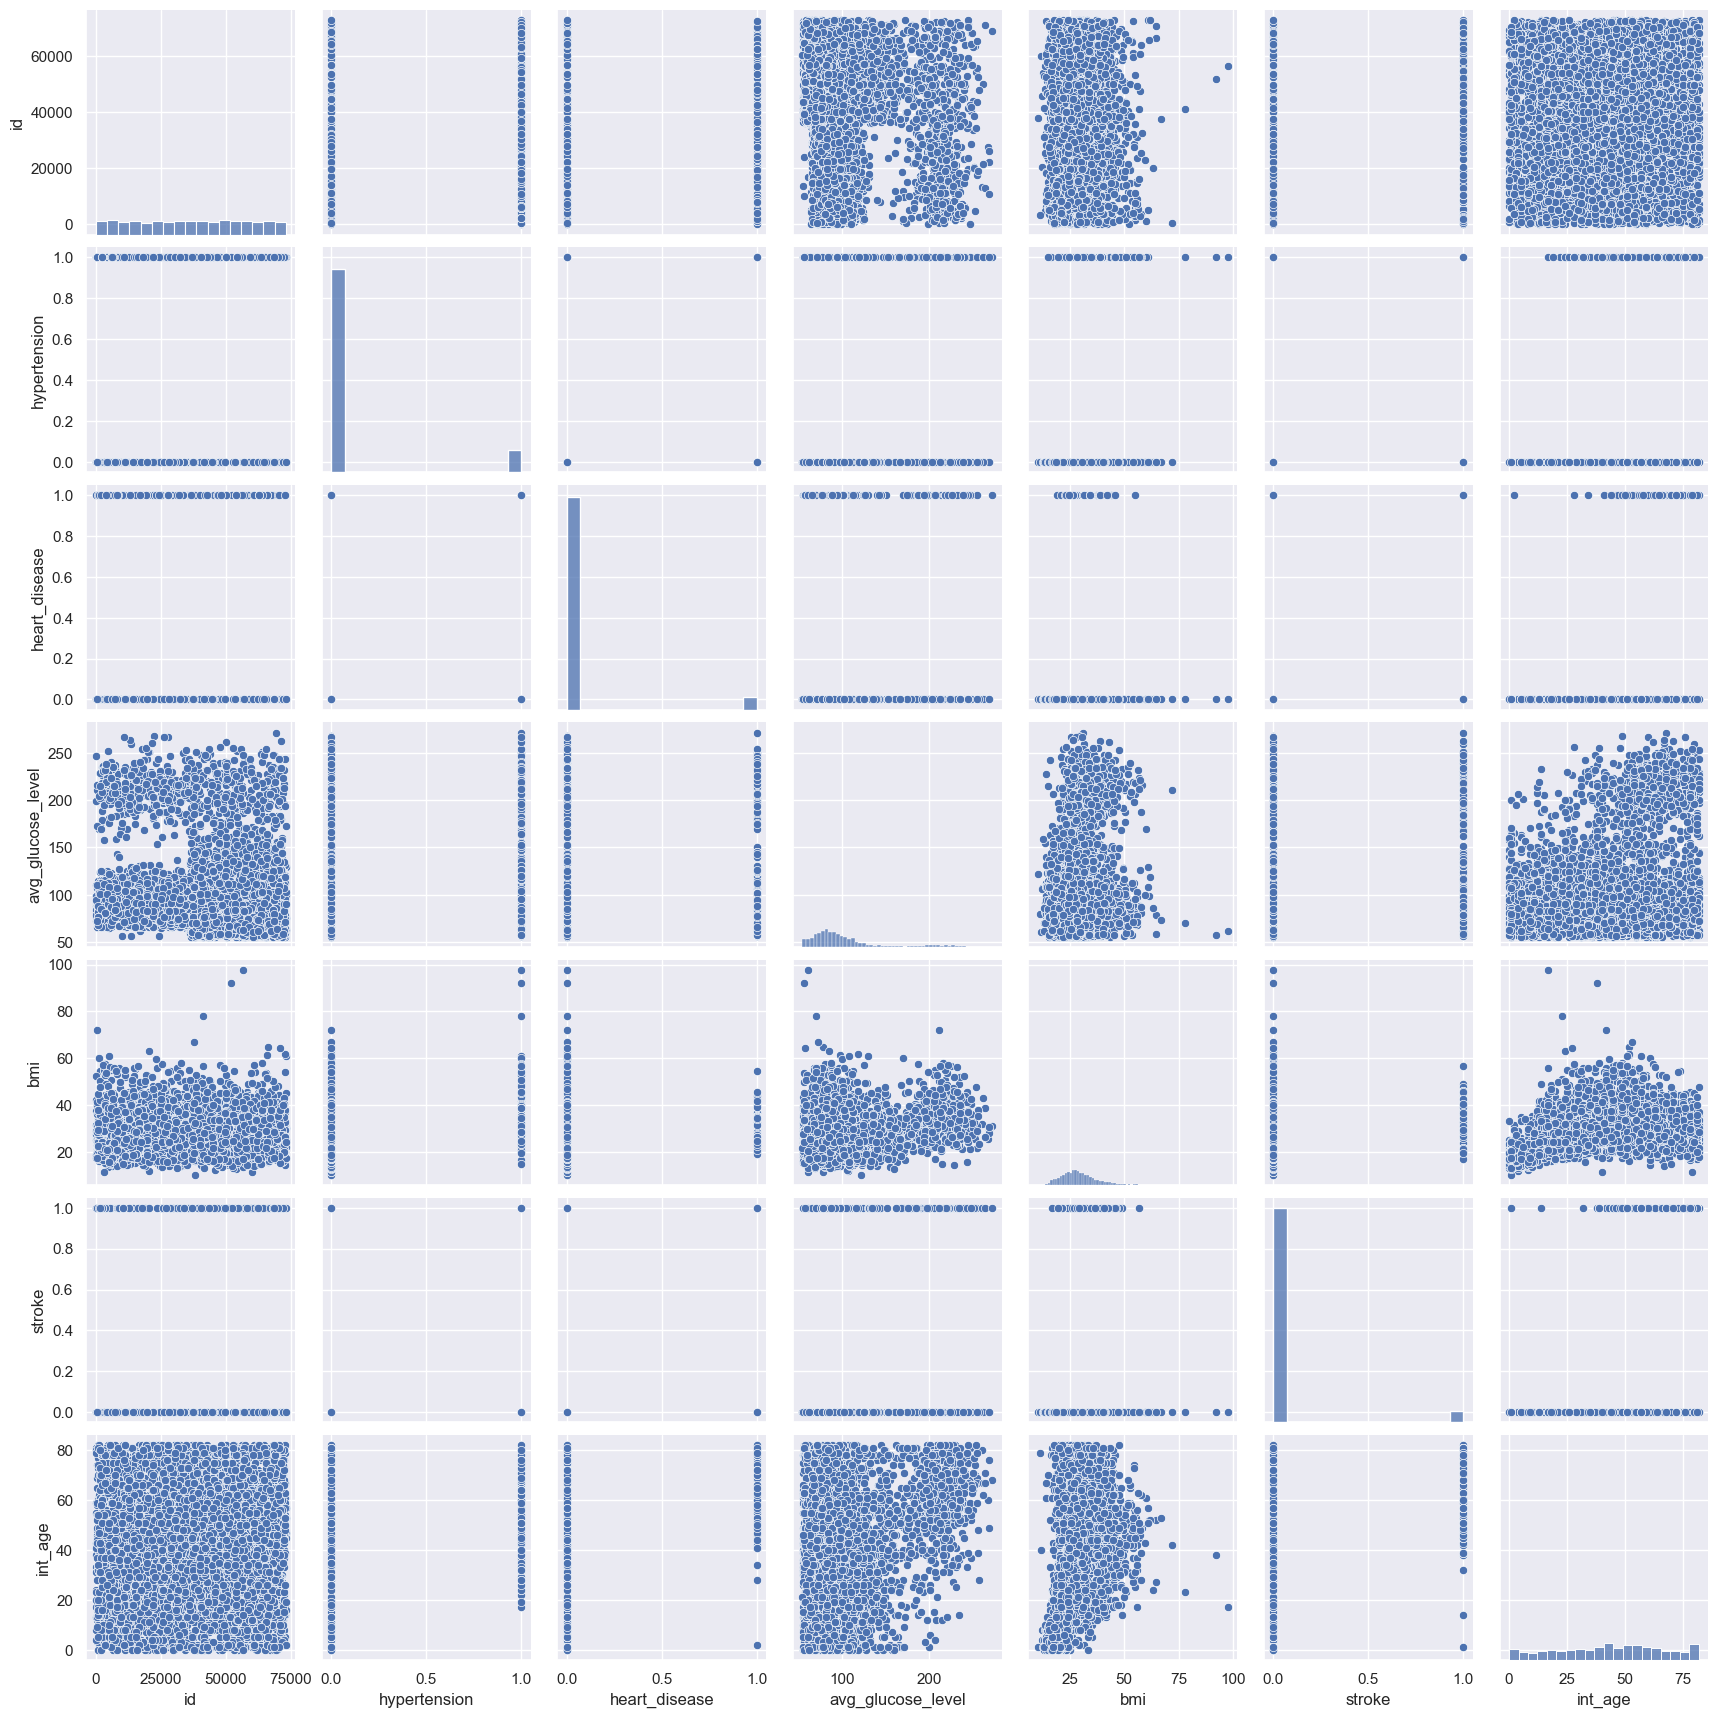

In [27]:
sns.pairplot(df)
plt.show()

## Analysis on stroke positive

In [28]:
stroke_positive = df.loc[df['stroke'] == 1]
stroke_positive

id  gender  hypertension  heart_disease ever_married      work_type  \
0     9046    Male             0              1          Yes        Private   
1    51676  Female             0              0          Yes  Self-employed   
2    31112    Male             0              1          Yes        Private   
3    60182  Female             0              0          Yes        Private   
4     1665  Female             1              0          Yes  Self-employed   
..     ...     ...           ...            ...          ...            ...   
244  17739    Male             0              0          Yes        Private   
245  49669  Female             0              0           No       children   
246  27153  Female             0              0          Yes  Self-employed   
247  34060    Male             1              0          Yes  Self-employed   
248  43424  Female             0              0          Yes        Private   

    Residence_type  avg_glucose_level   bmi   smoking_status  stroke  int_age  
0            Urban             228.69  36.6  formerly smoked       1       67  
1            Rural             202.21   NaN     never smoked       1       61  
2            Rural             105.92  32.5     never smoked       1       80  
3            Urban             171.23  34.4           smokes       1       49  
4            Rural             174.12  24.0     never smoked       1       79  
..             ...                ...   ...              ...     ...      ...  
244          Rural              84.96  36.7          Unknown       1       57  
245          Rural              57.93  30.9          Unknown       1       14  
246          Rural              78.80  29.3  formerly smoked       1       75  
247          Rural              87.80   NaN          Unknown       1       71  
248          Rural              78.81  19.6          Unknown       1       78  

[249 rows x 12 columns]

In [29]:
stroke_positive.shape

(249, 12)

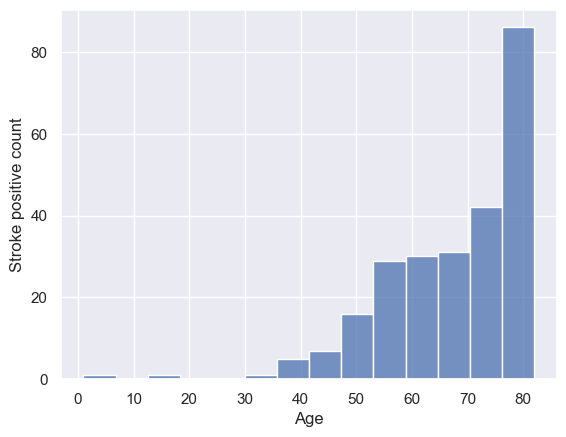

In [30]:
sns.histplot(data=stroke_positive['int_age'])
plt.xlabel('Age')
plt.ylabel('Stroke positive count')
plt.show()

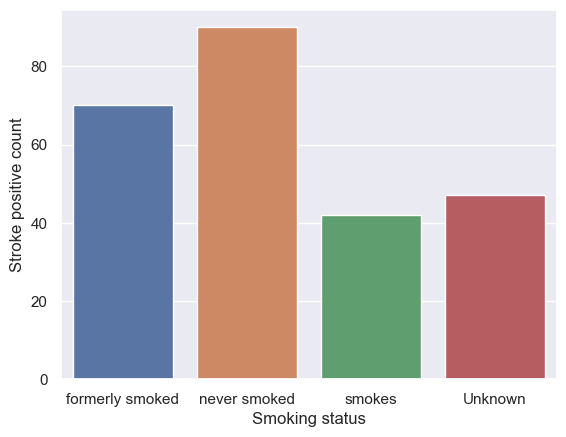

In [31]:
sns.countplot(data=stroke_positive,x='smoking_status') 
plt.xlabel('Smoking status')
plt.ylabel('Stroke positive count')
plt.show()

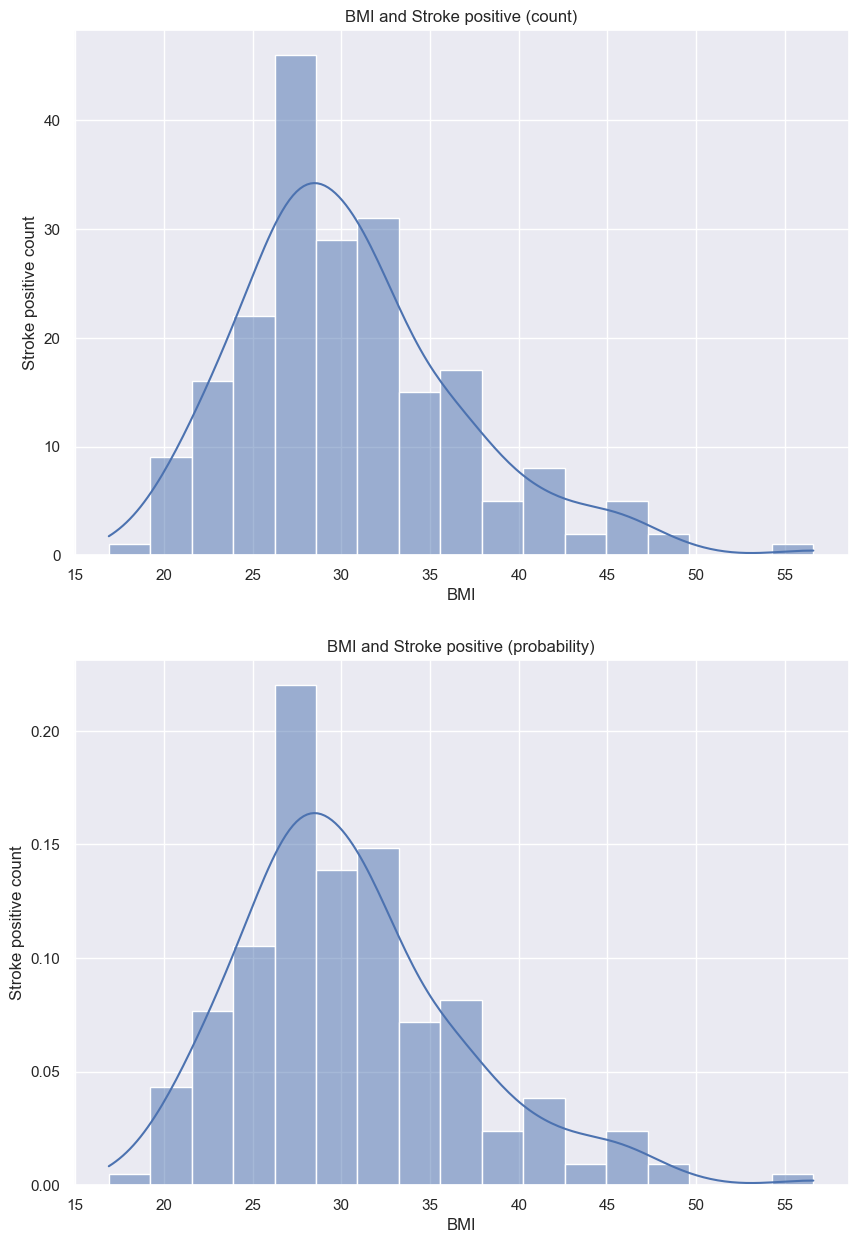

In [32]:
plt.figure(figsize=(10,15))
plt.subplot(2,1,1)
sns.histplot(data=stroke_positive['bmi'],kde=True)
plt.title('BMI and Stroke positive (count)')
plt.xlabel('BMI')
plt.ylabel('Stroke positive count')
plt.subplot(2,1,2)
sns.histplot(data=stroke_positive['bmi'],kde=True,stat='probability')
plt.title('BMI and Stroke positive (probability)')
plt.xlabel('BMI')
plt.ylabel('Stroke positive count')
plt.show()

Text(0, 0.5, 'BMI')

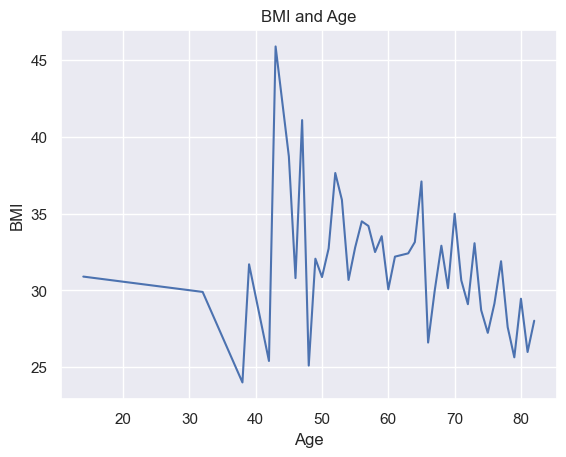

In [33]:
sns.lineplot(data=stroke_positive,x='int_age',y='bmi',ci=None)
plt.title('BMI and Age')
plt.xlabel('Age')
plt.ylabel('BMI')

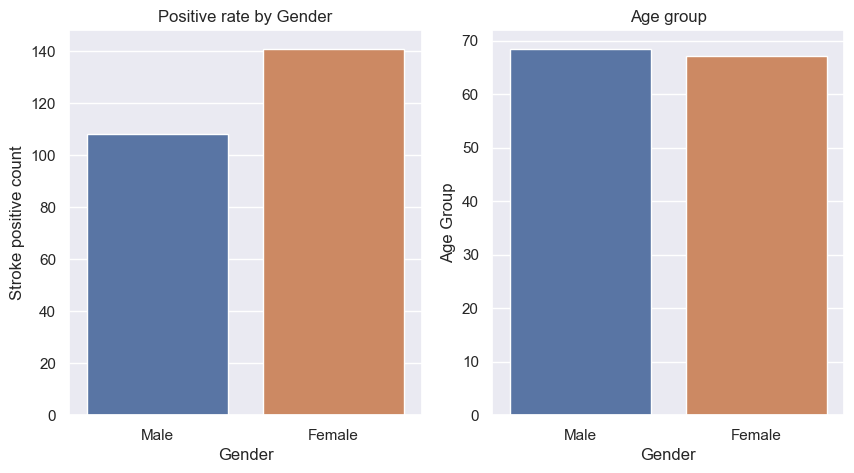

In [34]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(data=stroke_positive,x='gender')
plt.title('Positive rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Stroke positive count')
plt.subplot(1,2,2)
sns.barplot(data=stroke_positive,x='gender',y='int_age',ci=False)
plt.title('Age group')
plt.xlabel('Gender')
plt.ylabel('Age Group')
plt.show()

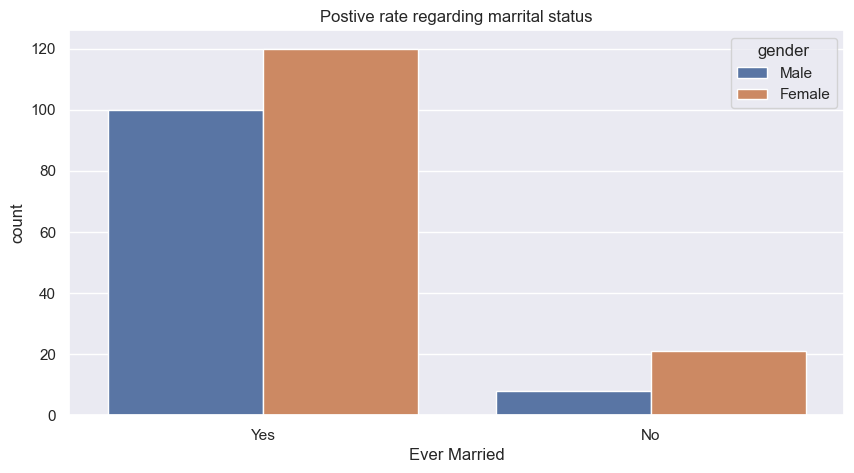

In [35]:
plt.figure(figsize=(10,5))
sns.countplot(data=stroke_positive,x='ever_married',hue='gender')
plt.title('Postive rate regarding marrital status')
plt.xlabel('Ever Married')
plt.show()

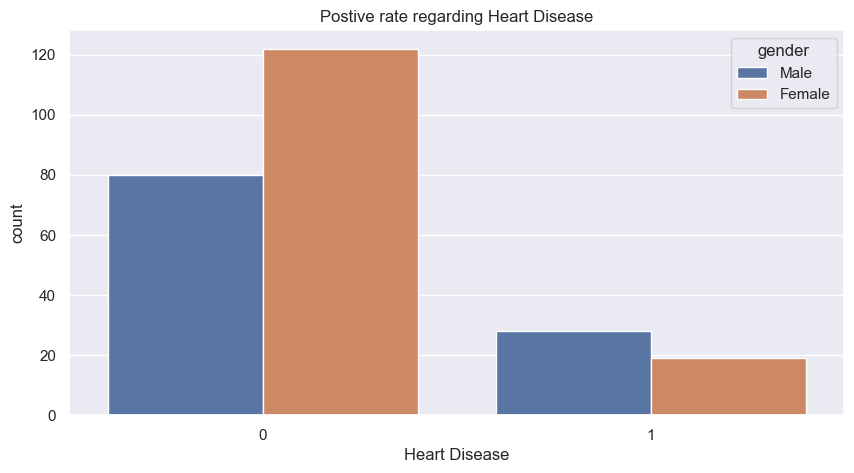

In [36]:
plt.figure(figsize=(10,5))
sns.countplot(data=stroke_positive,x='heart_disease',hue='gender')
plt.title('Postive rate regarding Heart Disease')
plt.xlabel('Heart Disease')
plt.show()

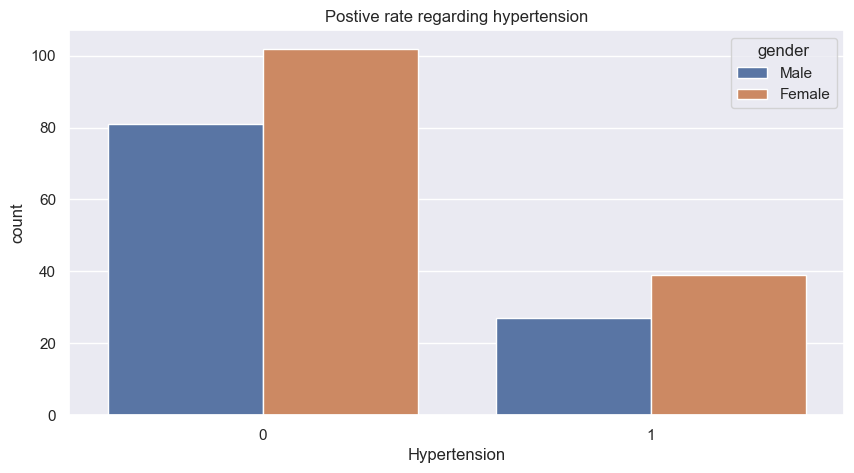

In [37]:
plt.figure(figsize=(10,5))
sns.countplot(data=stroke_positive,x='hypertension',hue='gender')
plt.title('Postive rate regarding hypertension')
plt.xlabel('Hypertension')
plt.show()

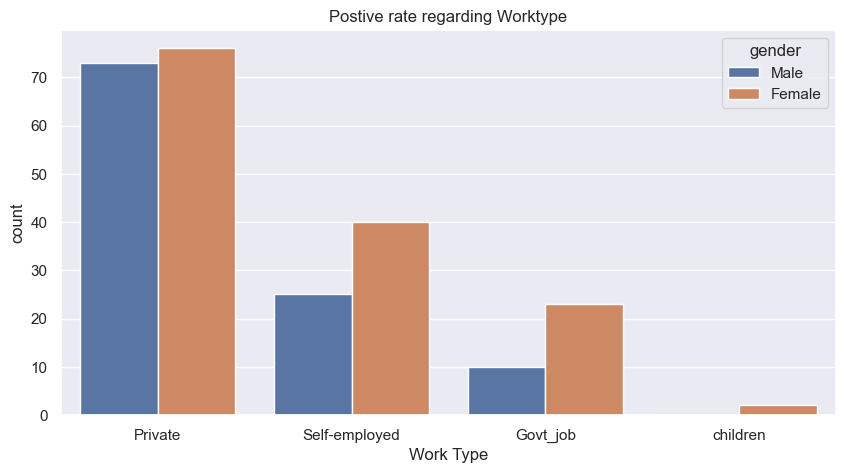

In [38]:
plt.figure(figsize=(10,5))
sns.countplot(data=stroke_positive,x='work_type',hue='gender')
plt.title('Postive rate regarding Worktype')
plt.xlabel('Work Type')
plt.show()

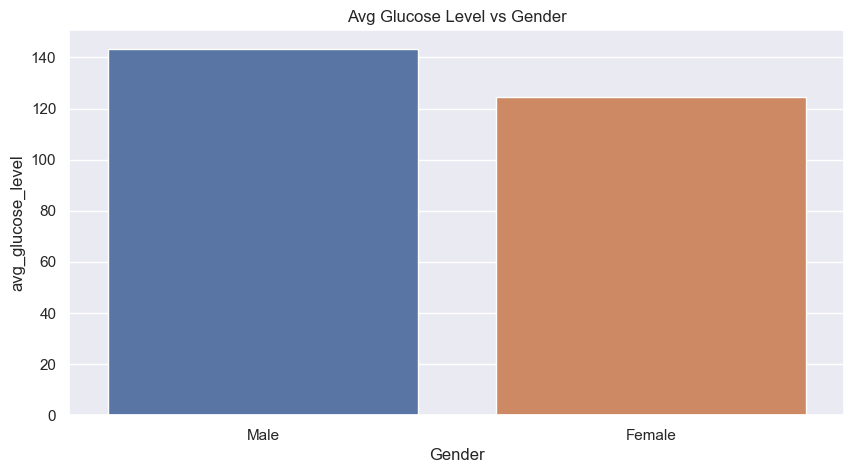

In [39]:
plt.figure(figsize=(10,5))
sns.barplot(data=stroke_positive,x='gender',y='avg_glucose_level',ci=False)
plt.title('Avg Glucose Level vs Gender')
plt.xlabel('Gender')
plt.show()

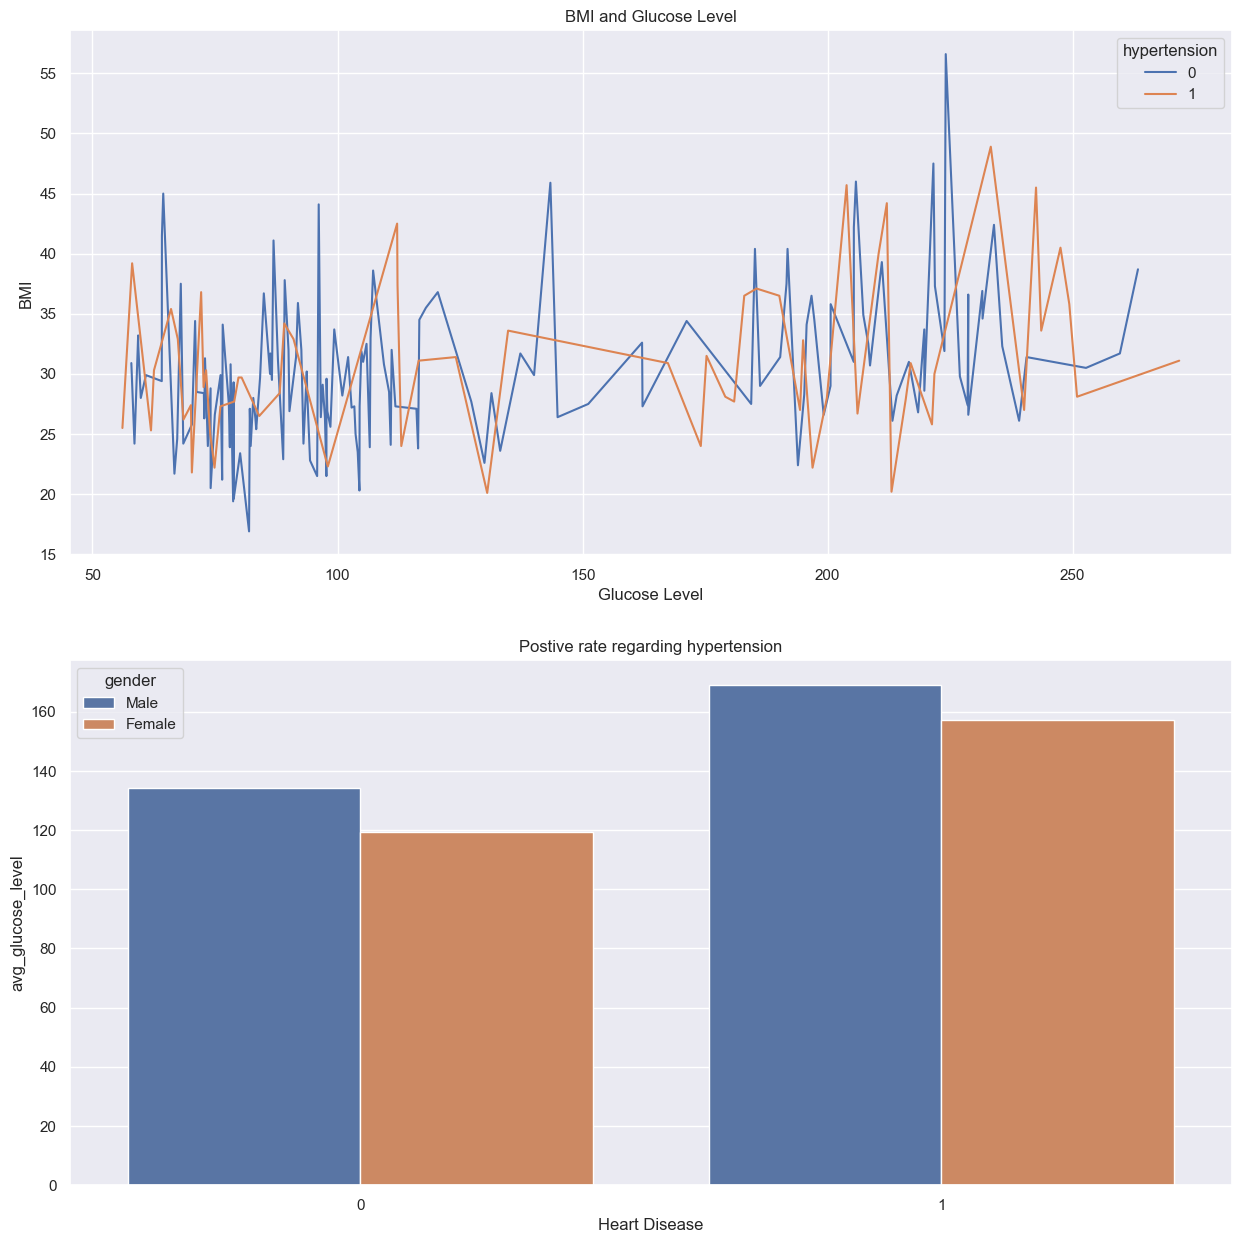

In [40]:
plt.figure(figsize=(15,15))
plt.subplot(2,1,1)
sns.lineplot(data=stroke_positive,x='avg_glucose_level',y='bmi',ci=None,hue='hypertension')
plt.title('BMI and Glucose Level')
plt.xlabel('Glucose Level')
plt.ylabel('BMI')
plt.subplot(2,1,2)
sns.barplot(data=stroke_positive,x='heart_disease',y='avg_glucose_level',hue='gender',ci=False)
plt.title('Postive rate regarding hypertension')
plt.xlabel('Heart Disease')
plt.show()

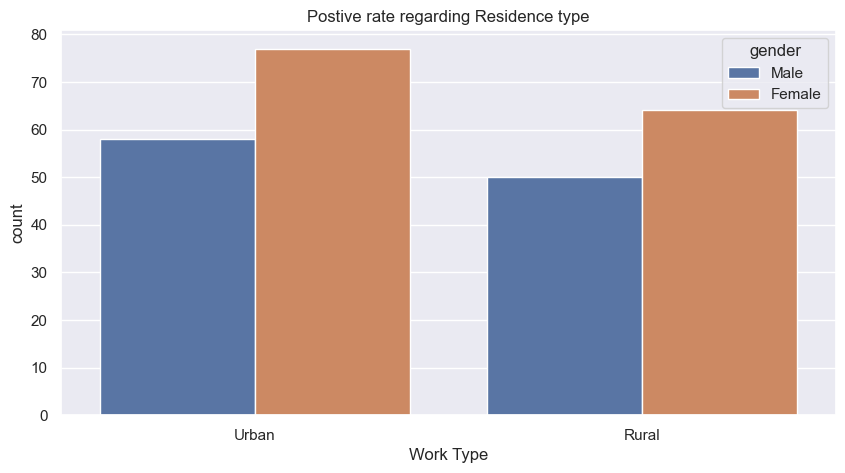

In [41]:
plt.figure(figsize=(10,5))
sns.countplot(data=stroke_positive,x='Residence_type',hue='gender')
plt.title('Postive rate regarding Residence type')
plt.xlabel('Work Type')
plt.show()

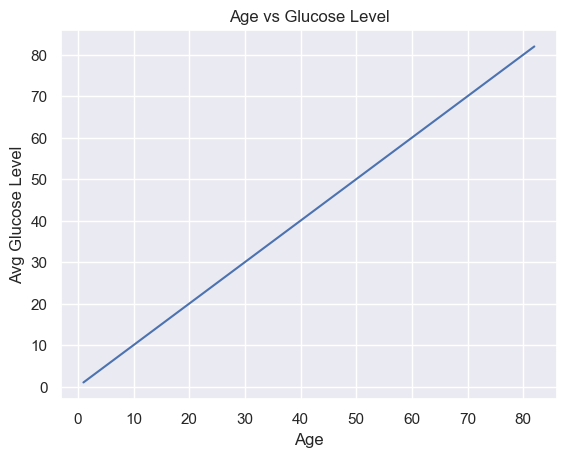

In [42]:

sns.lineplot(data=stroke_positive,x='int_age',y='int_age',ci=None)
plt.title('Age vs Glucose Level')
plt.xlabel('Age')
plt.ylabel('Avg Glucose Level')
plt.show()

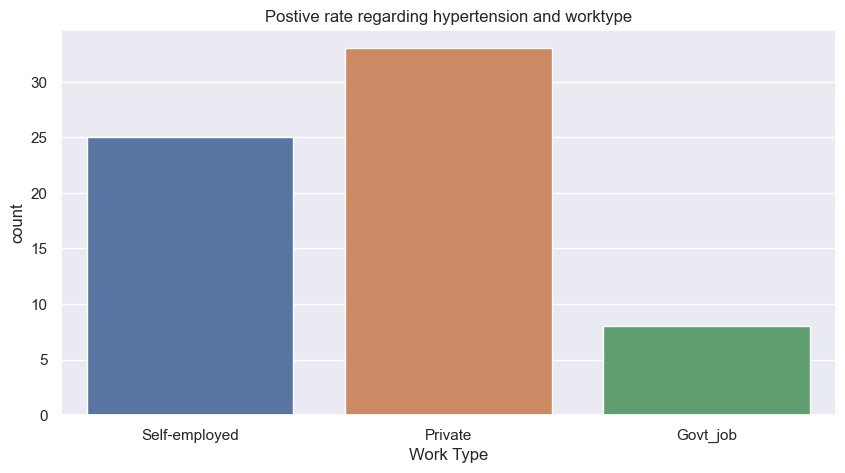

In [43]:
plt.figure(figsize=(10,5))
sns.countplot(data=stroke_positive[stroke_positive['hypertension']==1],x='work_type')
plt.title('Postive rate regarding hypertension and worktype')
plt.xlabel('Work Type')
plt.show()

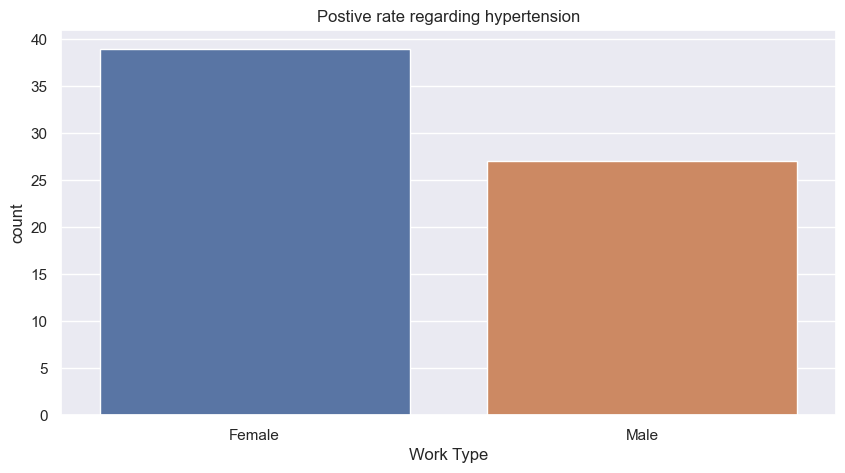

In [44]:
plt.figure(figsize=(10,5))
sns.countplot(data=stroke_positive[stroke_positive['hypertension']==1],x='gender')
plt.title('Postive rate regarding hypertension')
plt.xlabel('Work Type')
plt.show()

Text(0.5, 1.0, 'Hypertension and BMI on positive')

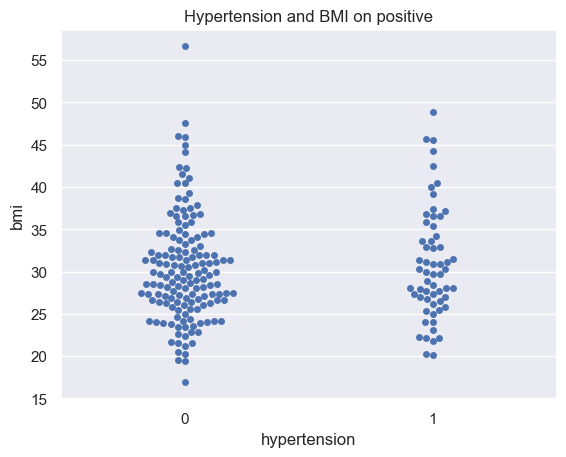

In [45]:
sns.swarmplot(data=stroke_positive,y='bmi',x='hypertension')
plt.title('Hypertension and BMI on positive')

<Figure size 1800x700 with 0 Axes>

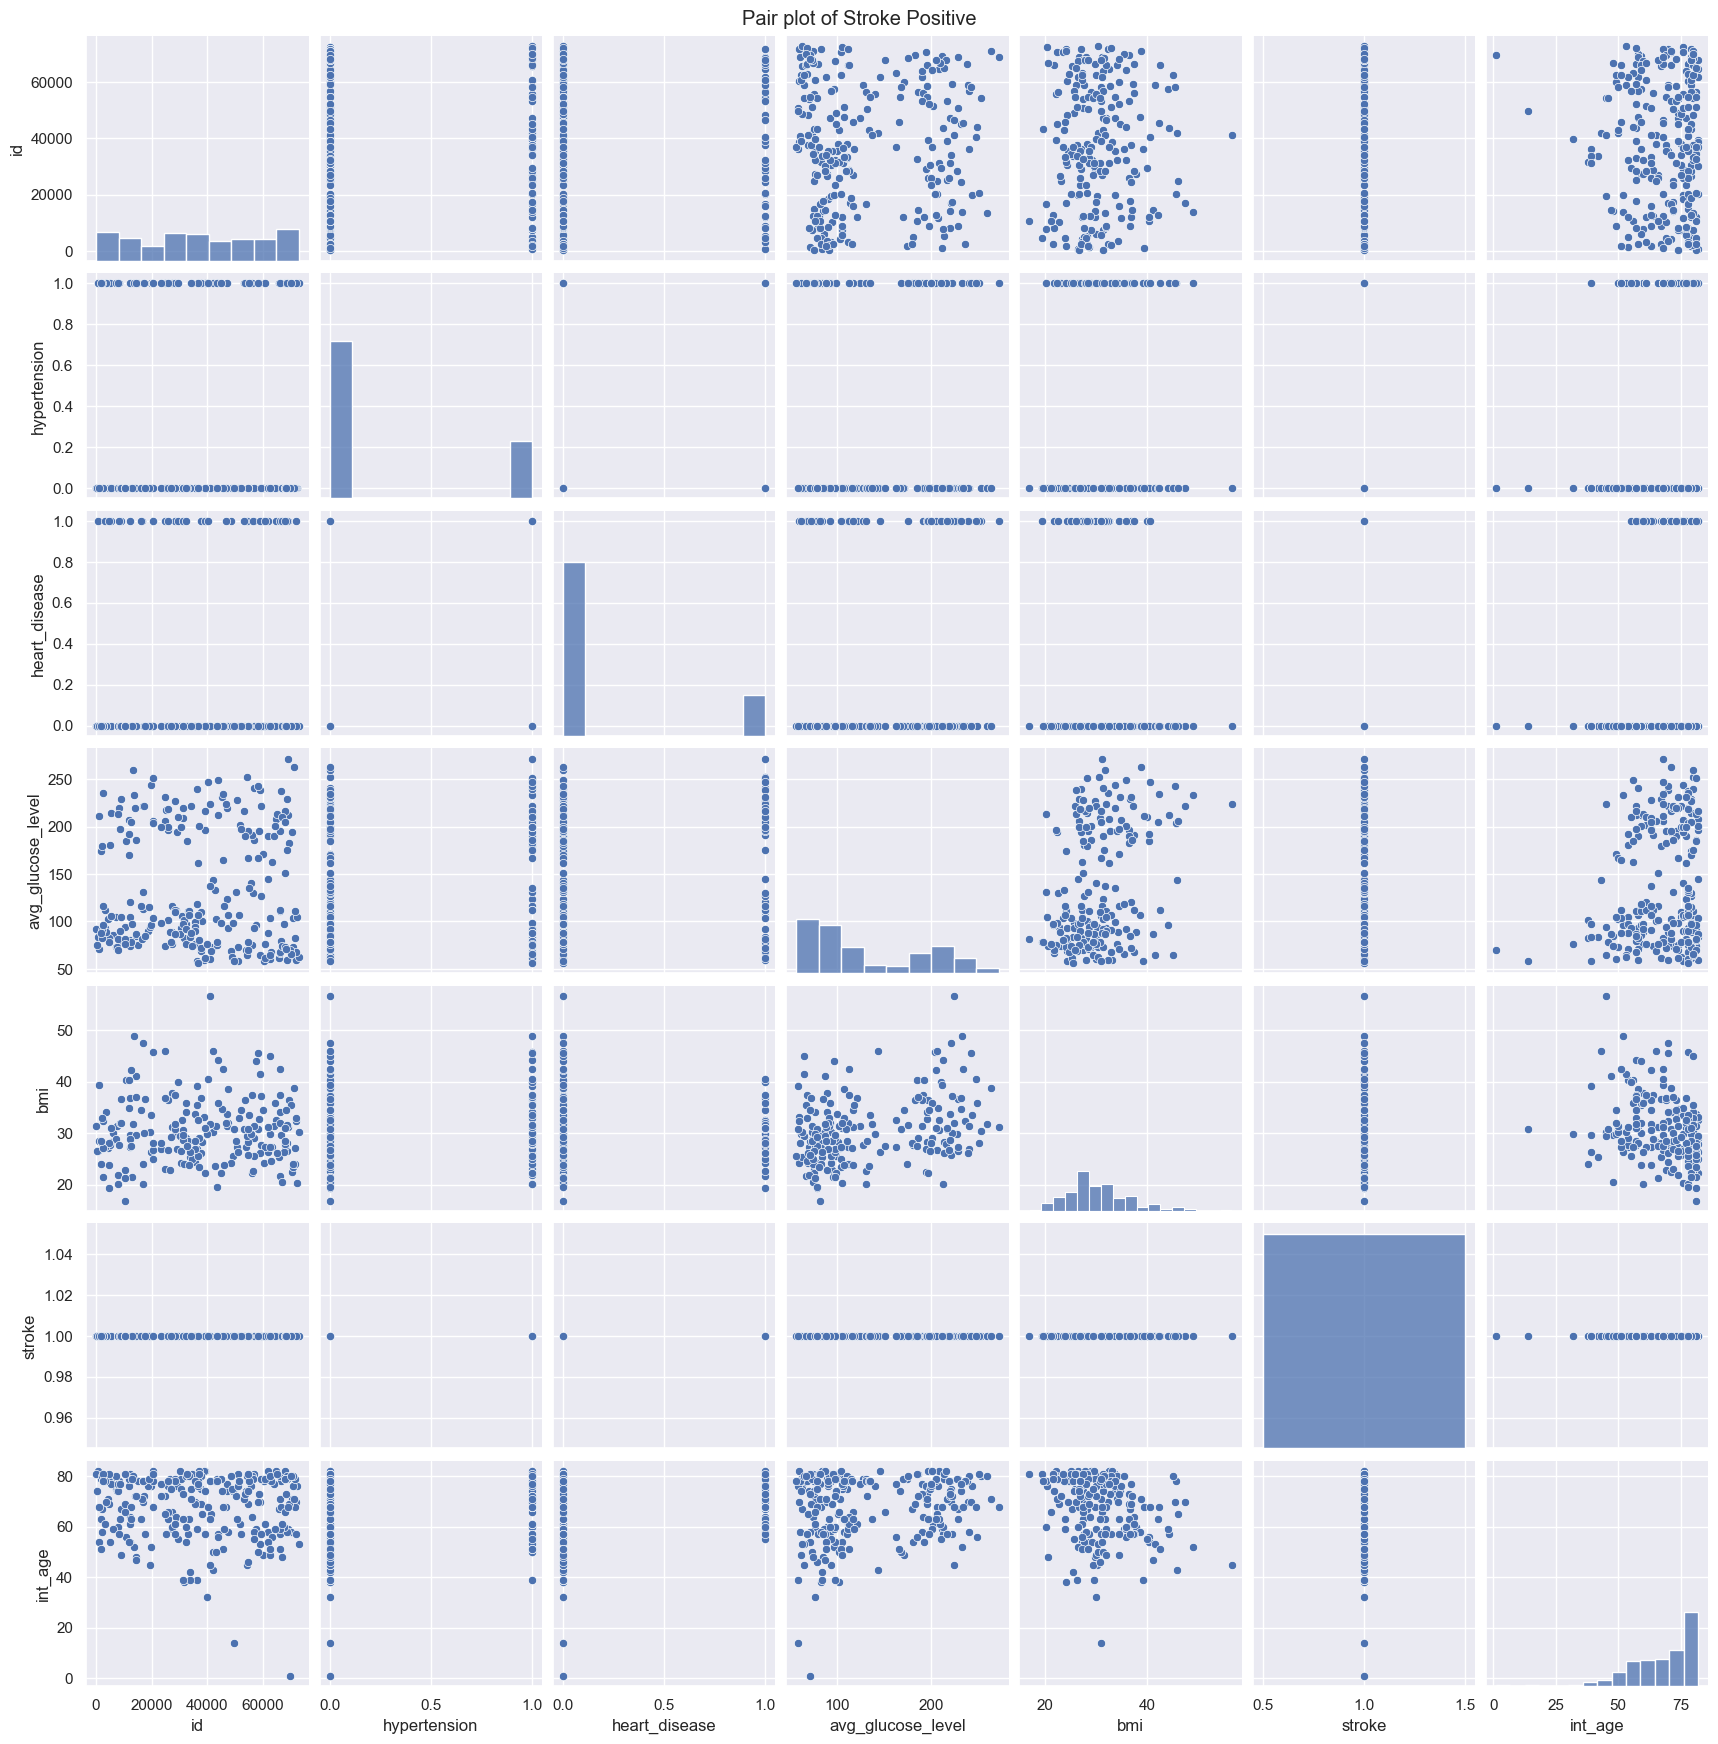

In [46]:
plt.figure(figsize=(18,7))
sns.pairplot(stroke_positive)
plt.suptitle('Pair plot of Stroke Positive',y=1)
plt.show()

## Analysis on stroke negative

In [47]:
stroke_negative = df.loc[df['stroke'] == 0]
stroke_negative

id  gender  hypertension  heart_disease ever_married      work_type  \
249   30669    Male             0              0           No       children   
250   30468    Male             1              0          Yes        Private   
251   16523  Female             0              0           No        Private   
252   56543  Female             0              0          Yes        Private   
253   46136    Male             0              0           No   Never_worked   
...     ...     ...           ...            ...          ...            ...   
5105  18234  Female             1              0          Yes        Private   
5106  44873  Female             0              0          Yes  Self-employed   
5107  19723  Female             0              0          Yes  Self-employed   
5108  37544    Male             0              0          Yes        Private   
5109  44679  Female             0              0          Yes       Govt_job   

     Residence_type  avg_glucose_level   bmi   smoking_status  stroke  int_age  
249           Rural              95.12  18.0          Unknown       0        3  
250           Urban              87.96  39.2     never smoked       0       58  
251           Urban             110.89  17.6          Unknown       0        8  
252           Rural              69.04  35.9  formerly smoked       0       70  
253           Rural             161.28  19.1          Unknown       0       14  
...             ...                ...   ...              ...     ...      ...  
5105          Urban              83.75   NaN     never smoked       0       80  
5106          Urban             125.20  40.0     never smoked       0       81  
5107          Rural              82.99  30.6     never smoked       0       35  
5108          Rural             166.29  25.6  formerly smoked       0       51  
5109          Urban              85.28  26.2          Unknown       0       44  

[4861 rows x 12 columns]

In [48]:
stroke_negative.shape

(4861, 12)

handling imbalanced data == https://imbalanced-learn.org/stable/references/generated/imblearn.ensemble.BalancedBaggingClassifier.html#balancedbaggingclassifier

<Axes: title={'center': 'Age groups on stroke negative'}, xlabel='int_age', ylabel='Count'>

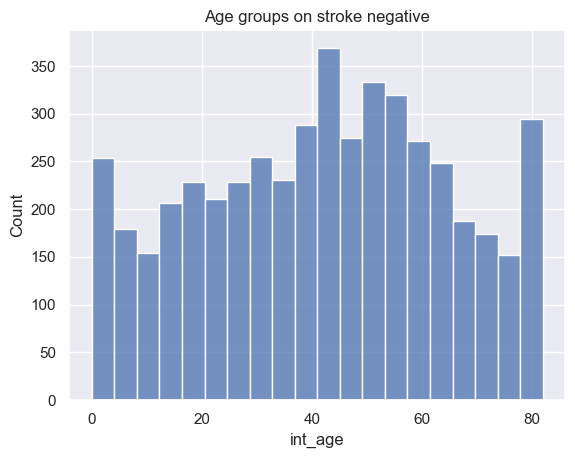

In [49]:
plt.title('Age groups on stroke negative')
sns.histplot(stroke_negative,x='int_age')

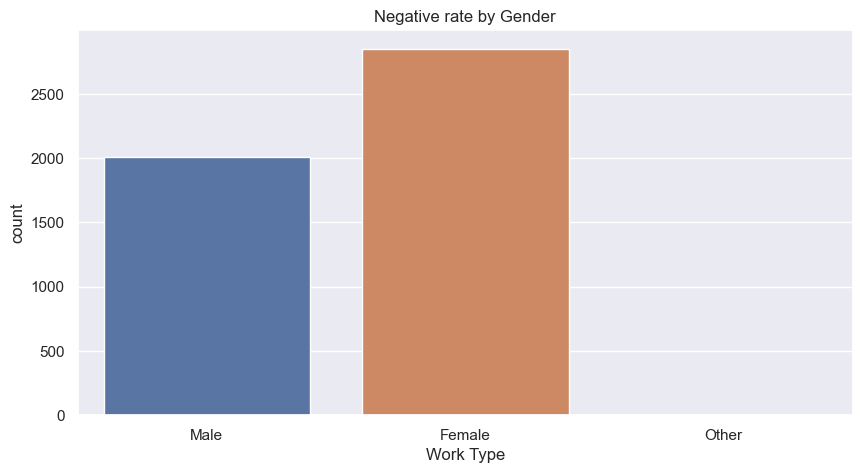

In [50]:
plt.figure(figsize=(10,5))
sns.countplot(data=stroke_negative,x='gender')
plt.title('Negative rate by Gender')
plt.xlabel('Work Type')
plt.show()

In [51]:
df = pd.read_csv('..\\Data\\healthcare-dataset-stroke-data.csv')
df.head()

id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1

## Data pre-processing

In [52]:
p = round(df.isnull().sum()*100/len(df),2)
p

id                   0.00
gender               0.00
age                  0.00
hypertension         0.00
heart_disease        0.00
ever_married         0.00
work_type            0.00
Residence_type       0.00
avg_glucose_level    0.00
bmi                  3.93
smoking_status       0.00
stroke               0.00
dtype: float64

In [53]:
df["bmi"].isnull().sum()

201

<Axes: >

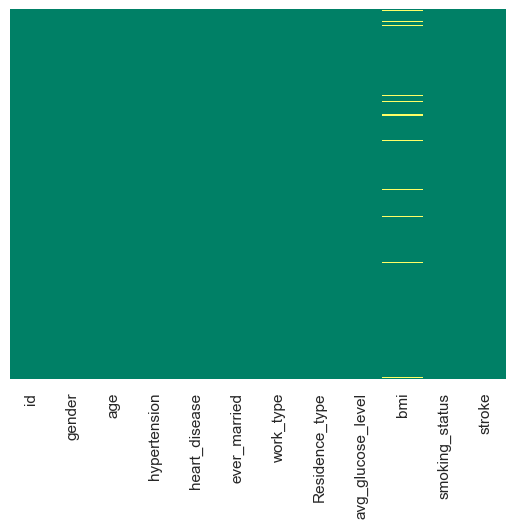

In [54]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False, cmap='summer')

In [55]:
df["bmi"]=df["bmi"].fillna(df["bmi"].mean())

<Axes: >

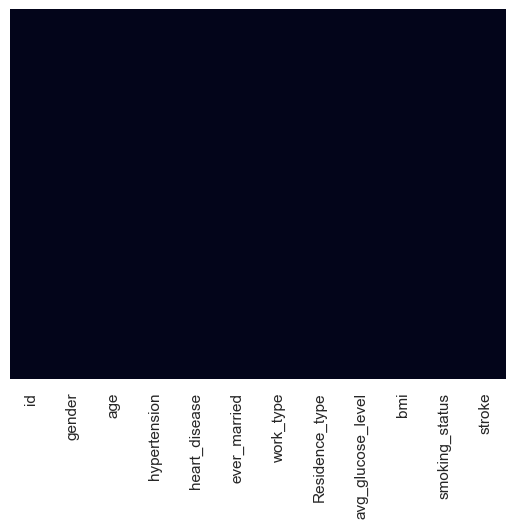

In [56]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [57]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [58]:
df_numerical = ['id','hypertension','heart_disease','age','avg_glucose_level','bmi','stroke']
df_categorical = ['gender','ever_married','work_type','Residence_type','smoking_status']

In [59]:
df_categorical

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

In [60]:
df_numerical

['id',
 'hypertension',
 'heart_disease',
 'age',
 'avg_glucose_level',
 'bmi',
 'stroke']

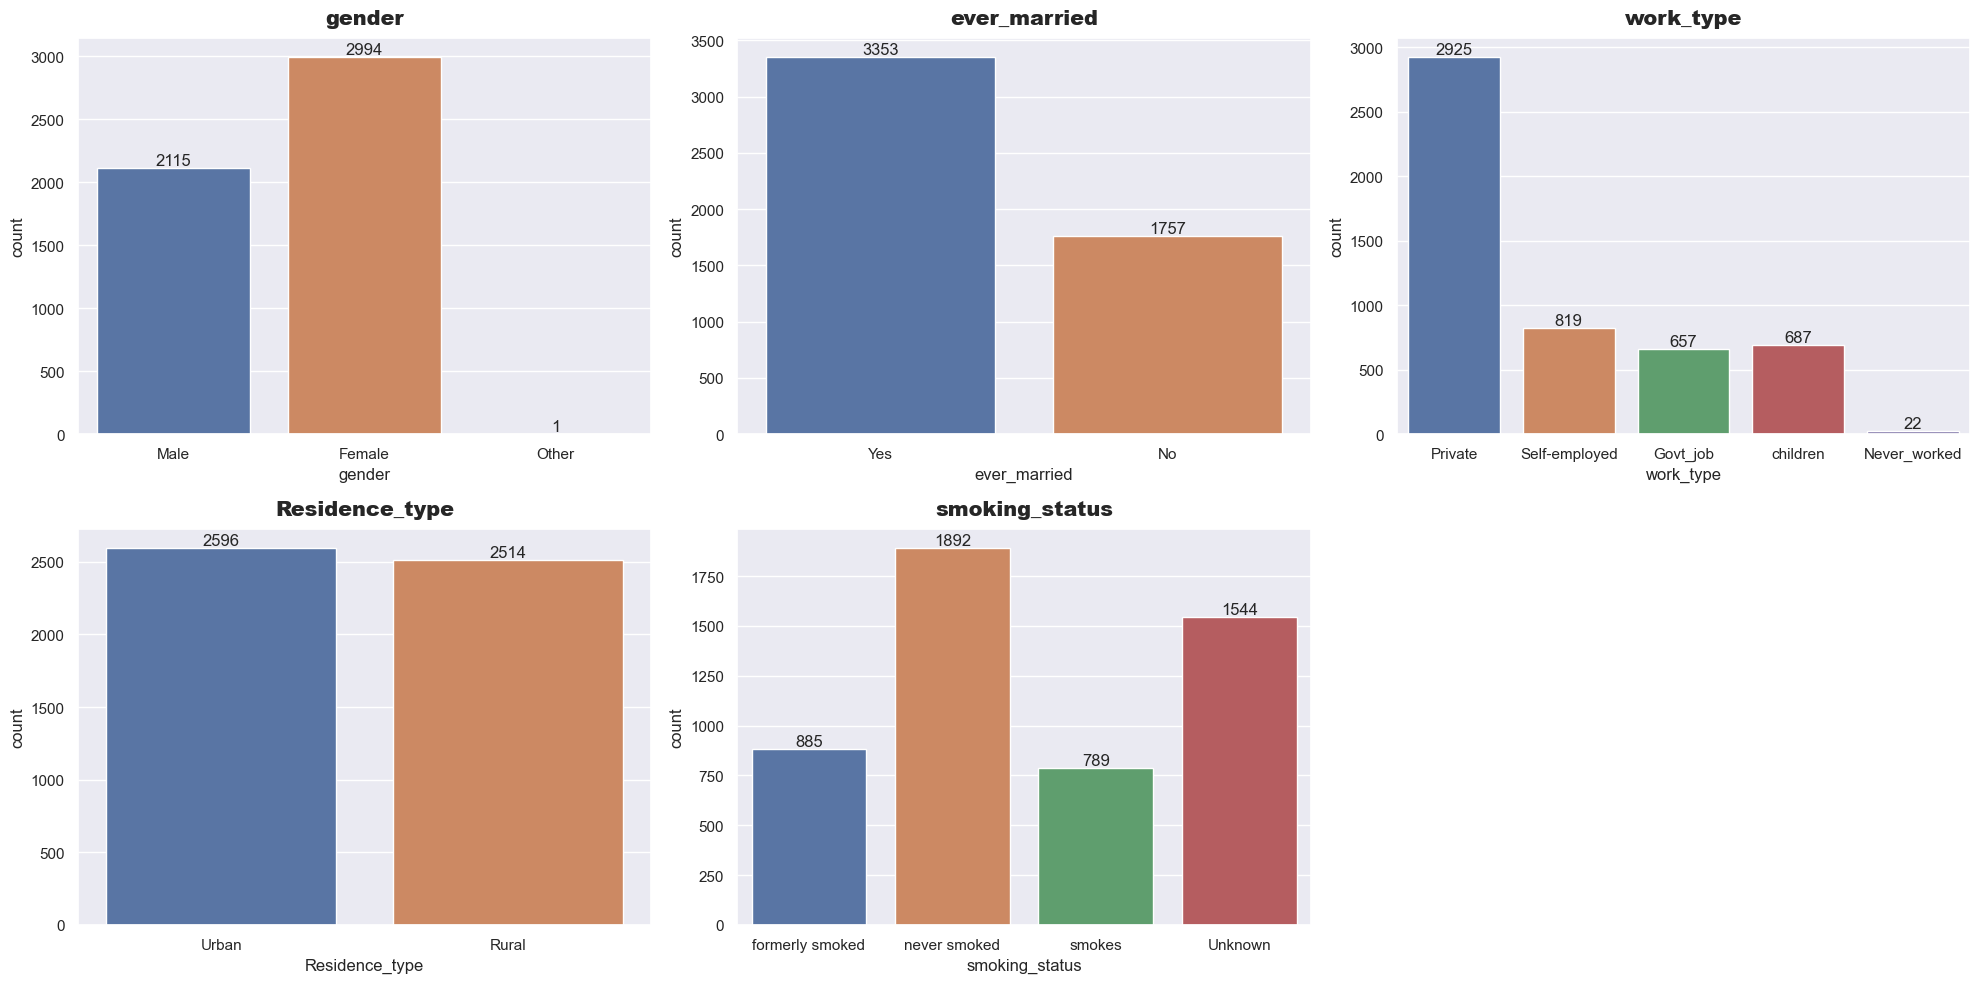

In [61]:
plt.figure(figsize=(20,10))
for i, cols in enumerate(df_categorical):
   plt.subplot(2,3,i+1)
   ax=sns.countplot(data=df, x=cols)
   for bars in ax.containers:
      ax.bar_label(bars)
   plt.title(f"{cols}",fontweight="black",pad=10,size=15)
plt.tight_layout()
plt.show()

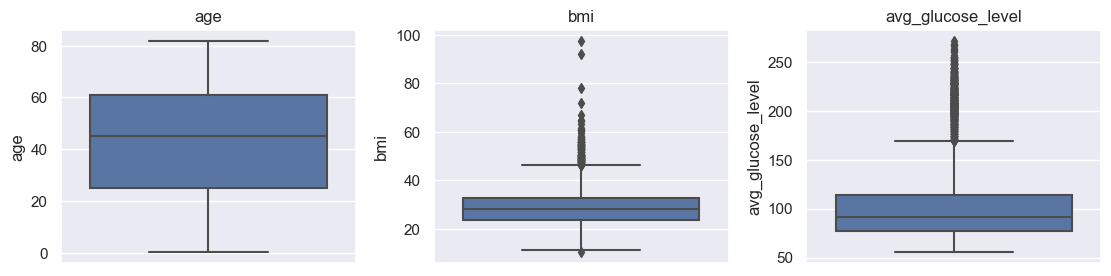

In [62]:
plt.figure(figsize=(15,8))
for i, j in enumerate(['age','bmi','avg_glucose_level']):
  plt.subplot(3,4,i+1)
  sns.boxplot(y=df[j])
  plt.title(f"{j}")
plt.tight_layout()
plt.show()

<Axes: >

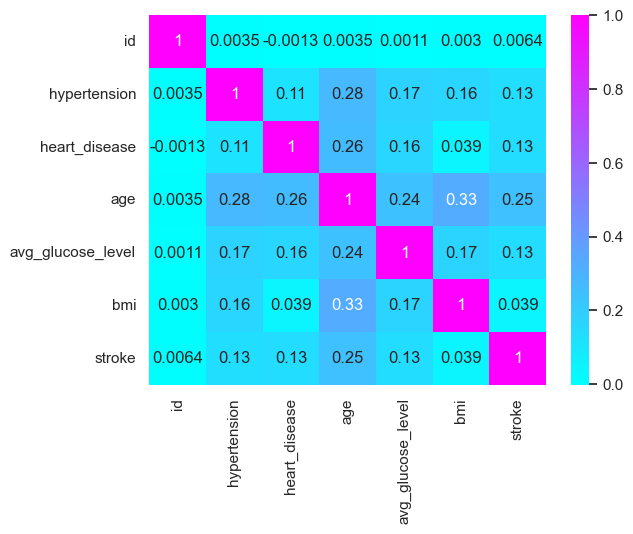

In [63]:
corr = df[df_numerical].corr()
sns.heatmap(corr, annot=True, cmap='cool')

In [64]:
corr=df[df_numerical].corr()["stroke"].sort_values(ascending=True)
corr.drop("stroke", inplace=True)
corr

id                   0.006388
bmi                  0.038947
hypertension         0.127904
avg_glucose_level    0.131945
heart_disease        0.134914
age                  0.245257
Name: stroke, dtype: float64

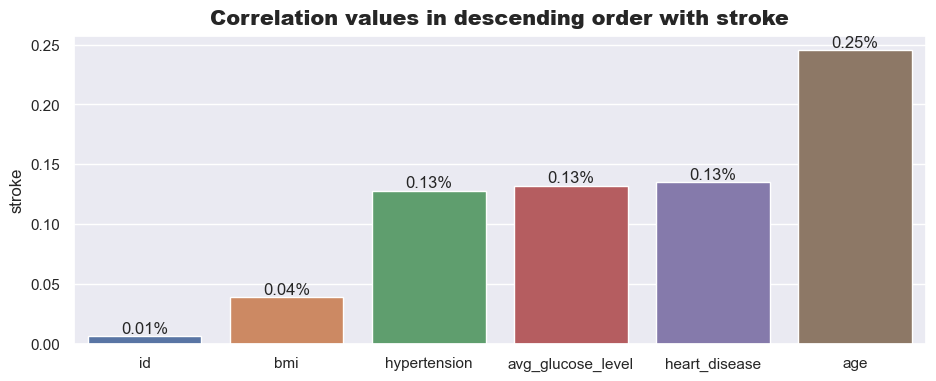

In [65]:
plt.figure(figsize=(11,4))
ax=sns.barplot(x=corr.keys(), y=corr)
for bars in ax.containers:
  ax.bar_label(bars, fmt="%.2f%%")
plt.title("Correlation values in descending order with stroke", size=15, fontweight="black",pad=8)
plt.show()

In [66]:
l = ["bmi","avg_glucose_level",'age']
clist = list()
def outlier_counter(l):    
    for i in l:
        count = 0
        Q1  = df[i].quantile(0.25)
        Q3  = df[i].quantile(0.75)
        IQR = Q3-Q1
        Uper = Q3+1.5*IQR
        lower = Q1-1.5*IQR
        for j in range(df.shape[0]):
            if df[i][j] > Uper:
                count += 1
        clist.append(count)
    return clist
con = outlier_counter(l)
print(f"Outlier count: \nBMI = {con[0]}\navg_glucose_level = {con[1]}\nage = {con[2]}")

Outlier count: 
BMI = 125
avg_glucose_level = 627
age = 0


In [67]:
def outlier_removal(l):
    for i in l:
        Q1  = df[i].quantile(0.25)
        Q3  = df[i].quantile(0.75)
        IQR = Q3-Q1
        Uper = Q3+1.5 * IQR
        lower = Q1-1.5 * IQR
        df[i]  = np.where(df[i]>Uper,Uper,(np.where(df[i]<lower,lower,df[i])))
outlier_removal(l)

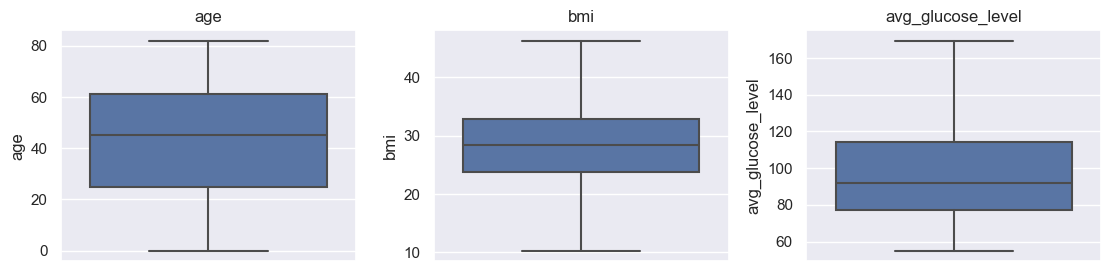

In [68]:
plt.figure(figsize=(15,8))
for i, j in enumerate(['age','bmi','avg_glucose_level']):
  plt.subplot(3,4,i+1)
  sns.boxplot(y=df[j])
  plt.title(f"{j}")
plt.tight_layout()
plt.show()

In [69]:
df.head()

id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level        bmi  \
0        Private          Urban           169.3575  36.600000   
1  Self-employed          Rural           169.3575  28.893237   
2        Private          Rural           105.9200  32.500000   
3        Private          Urban           169.3575  34.400000   
4  Self-employed          Rural           169.3575  24.000000   

    smoking_status  stroke  
0  formerly smoked       1  
1     never smoked       1  
2     never smoked       1  
3           smokes       1  
4     never smoked       1

In [70]:
one_hot=["gender","ever_married","Residence_type","work_type","smoking_status"]
df=pd.get_dummies(df,columns=one_hot,dtype='int64')

In [71]:
df.sample()

id   age  hypertension  heart_disease  avg_glucose_level   bmi  \
3413  27916  18.0             0              0              97.39  22.8   

      stroke  gender_Female  gender_Male  gender_Other  ...  \
3413       0              0            1             0  ...   

      Residence_type_Urban  work_type_Govt_job  work_type_Never_worked  \
3413                     1                   0                       0   

      work_type_Private  work_type_Self-employed  work_type_children  \
3413                  1                        0                   0   

      smoking_status_Unknown  smoking_status_formerly smoked  \
3413                       0                               0   

      smoking_status_never smoked  smoking_status_smokes  
3413                            1                      0  

[1 rows x 23 columns]

# Model Building

In [72]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [73]:
df.shape

(5110, 23)

In [74]:
x=df.drop(["stroke"], axis=1)
y=df["stroke"]

In [75]:
x.shape

(5110, 22)

In [76]:
y.shape

(5110,)

In [77]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
xtrain,xtest,ytrain,ytest = train_test_split(x_scaled, y, test_size = 0.2, random_state=2)

In [78]:
print(f'xtrain = {xtrain.shape}\nytrain = {ytrain.shape}\nxtest = {xtest.shape}\nytest = {ytest.shape}\n')

xtrain = (4088, 22)
ytrain = (4088,)
xtest = (1022, 22)
ytest = (1022,)



In [79]:
smote = SMOTE()
resampled_xtrain, resampled_ytrain = smote.fit_resample(xtrain, ytrain)

In [80]:
print(resampled_xtrain.shape)
print(resampled_ytrain.shape)

(7780, 22)
(7780,)


In [81]:
resampled_ytrain.value_counts()

stroke
0    3890
1    3890
Name: count, dtype: int64

## Decision Tree Classification

In [82]:
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(resampled_xtrain, resampled_ytrain)
pred = classifier.predict(xtest)
train_pred = classifier.predict(resampled_xtrain)
print('Classification report\n'+classification_report(ytest,pred))
print("Train prediction accuracy =",np.mean(train_pred == resampled_ytrain)*100)
print("Test prediction accuracy =",np.mean(pred == ytest)*100)

Classification report
              precision    recall  f1-score   support

           0       0.96      0.90      0.93       971
           1       0.11      0.24      0.15        51

    accuracy                           0.86      1022
   macro avg       0.53      0.57      0.54      1022
weighted avg       0.91      0.86      0.89      1022

Train prediction accuracy = 100.0
Test prediction accuracy = 86.3013698630137


## Multiple model validation

In [83]:
models = [
    (RandomForestClassifier, {"n_estimators": 100, "random_state": 42}),
    (DecisionTreeClassifier, {"random_state": 42}),
    (GradientBoostingClassifier, {"random_state": 42}),
    (AdaBoostClassifier, {"n_estimators": 50, "random_state": 42}),
    (xgb.XGBClassifier, {"n_estimators": 100, "random_state": 42}),
    (LogisticRegression, {"max_iter": 1000, "random_state": 42}),
    (SVC, {"kernel": "linear"}),
    (KNeighborsClassifier, {"n_neighbors": 5}),
    (GaussianNB,{})]

In [84]:
results = {}
for model_class, model_params in models:
    model = model_class(**model_params)
    model.fit(resampled_xtrain, resampled_ytrain)
    ypred = model.predict(xtest)
    accuracy = accuracy_score(ytest, ypred)
    model_name = model_class.__name__
    results[model_name] = accuracy
for model_name, accuracy in results.items():
    print(f"{model_name}: Accuracy = {accuracy}")

RandomForestClassifier: Accuracy = 0.9119373776908023
DecisionTreeClassifier: Accuracy = 0.8620352250489237
GradientBoostingClassifier: Accuracy = 0.8385518590998043
AdaBoostClassifier: Accuracy = 0.7671232876712328
XGBClassifier: Accuracy = 0.9217221135029354
LogisticRegression: Accuracy = 0.7338551859099804
SVC: Accuracy = 0.7093933463796478
KNeighborsClassifier: Accuracy = 0.8277886497064579
GaussianNB: Accuracy = 0.337573385518591


RandomForestClassifier: Accuracy = 0.9129158512720157 <br>
XGBClassifier: Accuracy = 0.913894324853229 <br>
As of the result we are fitting with these algos

## Hyper-parameter Tuning and fitting of the model Random Forest

In [85]:
#  param_grid = {
#     "n_estimators": [10, 50, 100],
#     "max_depth": [3, 5, 7, 10],
#     "min_samples_split": [5,10,15,20],
#     "min_samples_leaf": [1, 2, 5, 7, 10],
#     "criterion": ["gini","entropy"]
# }
# rfc = RandomForestClassifier()
# grid_search = GridSearchCV(rfc, param_grid, scoring="accuracy", cv=KFold(n_splits=5),n_jobs=1)
# grid_search.fit(resampled_xtrain, resampled_ytrain)
# print(grid_search.best_params_)

In [86]:
# grid_search.best_score_

In [87]:
rfc = RandomForestClassifier(criterion='gini', max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100)
rfc.fit(resampled_xtrain, resampled_ytrain)
pred = rfc.predict(xtest)
train_pred = rfc.predict(resampled_xtrain)
print('Classification report\n'+classification_report(ytest,pred))
print("Accuracy =",np.mean(pred == ytest)*100)

Classification report
              precision    recall  f1-score   support

           0       0.97      0.84      0.90       971
           1       0.13      0.45      0.20        51

    accuracy                           0.82      1022
   macro avg       0.55      0.65      0.55      1022
weighted avg       0.93      0.82      0.87      1022

Accuracy = 82.4853228962818


In [88]:
confusionmatrix = confusion_matrix(pred,ytest)
confusionmatrix

array([[820,  28],
       [151,  23]], dtype=int64)

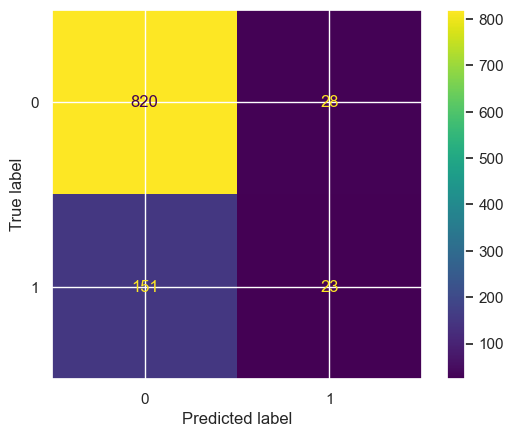

In [89]:
cm_plot = ConfusionMatrixDisplay(confusion_matrix=confusionmatrix)
cm_plot.plot()

## Hyper-parameter Tuning and fitting of the model using XGBoost

In [90]:
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [3, 4, 5],
#     'learning_rate': [0.1, 0.05, 0.01]
# }
# model = xgb.XGBClassifier()
# grid_search = GridSearchCV(model, param_grid, cv=5)
# grid_search.fit(resampled_xtrain, resampled_ytrain)

In [91]:
# grid_search.best_params_

In [92]:
model = xgb.XGBClassifier(learning_rate=0.1,max_depth=5,n_estimators=300)
model.fit(resampled_xtrain,resampled_ytrain)
pred = model.predict(xtest)
print("Accuracy =",np.mean(pred == ytest)*100)

Accuracy = 91.19373776908023


In [93]:
confusionmatrix = confusion_matrix(pred,ytest)
confusionmatrix

array([[924,  43],
       [ 47,   8]], dtype=int64)

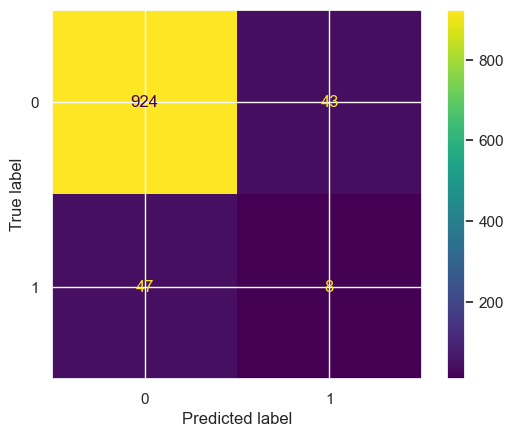

In [94]:
cm_plot = ConfusionMatrixDisplay(confusion_matrix=confusionmatrix)
cm_plot.plot()